<a href="https://colab.research.google.com/github/Gerges-Monir/soft-assignment/blob/main/soft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
cities = np.array([[0.5, 0.2], [0.1, 0.8], [0.7, 0.6], [0.9, 0.4], [0.3, 0.9]])

In [4]:
# Calculate the Euclidean distance between two cities
def calculate_distance(city1, city2):
    return np.linalg.norm(city1 - city2)

In [5]:
def calculate_tour_length(tour):
    total_length = 0
    num_cities = len(tour)
    for i in range(num_cities - 1):
        total_length += calculate_distance(cities[tour[i]], cities[tour[i + 1]])
    total_length += calculate_distance(cities[tour[-1]], cities[tour[0]])
    return total_length

In [6]:
def generate_initial_tour():
    tour = list(range(len(cities)))
    random.shuffle(tour)
    return tour

In [9]:
def plot_tour(tour):
    plt.scatter(cities[:, 0], cities[:, 1], color='red', zorder=1)
    plt.plot(cities[tour + [tour[0]], 0], cities[tour + [tour[0]], 1], color='blue', zorder=2)
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('TSP Solution')
    plt.show()

In [27]:
# Perform the Firefly Algorithm
def perform_firefly_algorithm(num_fireflies=50, max_iterations=100, alpha=0.7, beta=1.0, gamma=1.0, stagnation_threshold=10):
    # Initialize the fireflies
    fireflies = []
    for _ in range(num_fireflies):
        fireflies.append(generate_initial_tour())

In [28]:
def plot_tour(tour):
    plt.scatter(cities[:, 0], cities[:, 1], color='red', zorder=1)
    plt.plot(cities[tour + [tour[0]], 0], cities[tour + [tour[0]], 1], color='blue', zorder=2)
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('TSP Solution')

In [29]:
def perform_firefly_algorithm(num_fireflies=50, max_iterations=50, alpha=0.6, beta=1.0, gamma=1.0, stagnation_threshold=10):
    # Initialize the fireflies
    fireflies = []
    for _ in range(num_fireflies):
        fireflies.append(generate_initial_tour())

    # Initialize the best solution
    best_solution = None
    best_solution_length = float('inf')

    # Add empty lists to store the attractiveness values and best solution lengths
    attractiveness = []
    best_lengths = []

    # Initialize stagnation counter
    stagnation_counter = 0

    # Main loop
    for iteration in range(max_iterations):
        # For each firefly, move towards brighter fireflies
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if calculate_tour_length(fireflies[i]) > calculate_tour_length(fireflies[j]):
                    attractiveness_ij = alpha * np.exp(-beta * calculate_distance(fireflies[i][0], fireflies[j][0]) ** gamma)
                    if random.random() < attractiveness_ij:
                        fireflies[i] = fireflies[j].copy()

        # Find the firefly with the best solution
        current_solution = fireflies[0].copy()
        current_solution_length = calculate_tour_length(current_solution)
        if best_solution is None or current_solution_length < best_solution_length:
            best_solution = current_solution.copy()
            best_solution_length = current_solution_length
            stagnation_counter = 0
        else:
            stagnation_counter += 1

        # Calculate the attractiveness of each firefly and append it to the list
        attractiveness.append(best_solution_length)
        best_lengths.append(best_solution_length)

        

        # Check for stagnation
        if stagnation_counter >= stagnation_threshold:
            print("Stagnation reached. Exiting...")
            break

    # Plot the histogram of attractiveness
    plt.figure()
    plt.hist(attractiveness, bins=20)
    plt.xlabel('Attractiveness')
    plt.ylabel('Frequency')
    plt.title('Histogram of Attractiveness')
    plt.show()

    # Plot the convergence of best solution length over iterations
    plt.figure()
    plt.plot(best_lengths)
    plt.xlabel('Iteration')
    plt.ylabel('Best Solution Length')
    plt.title('Convergence Plot')
    plt.show()

    # Plot the scatter plot of fireflies' solutions
    plt.figure()
    for firefly in fireflies:
        plot_tour(firefly)
    plt.title('Fireflies Solutions')
    plt.show()

    # Return the best solution
    return best_solution


Stagnation reached. Exiting...


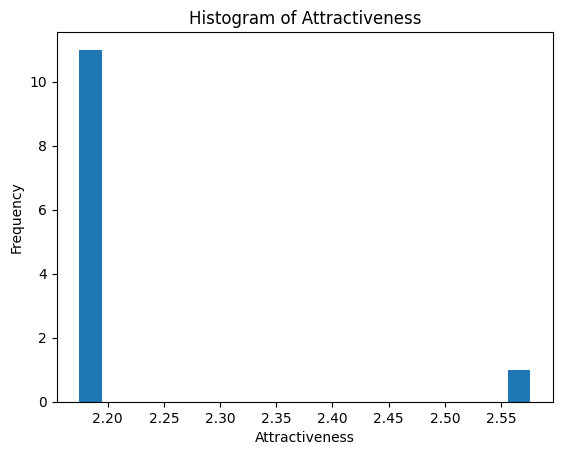

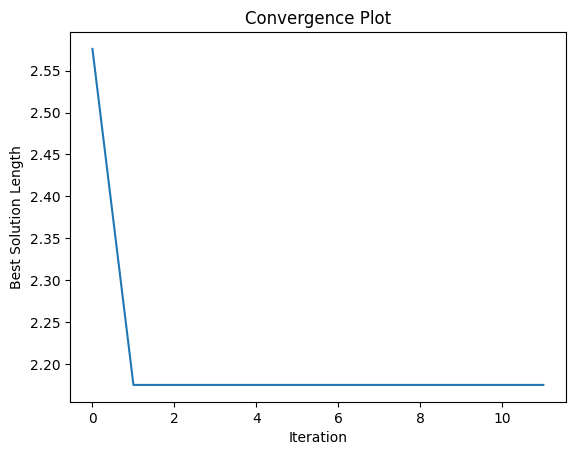

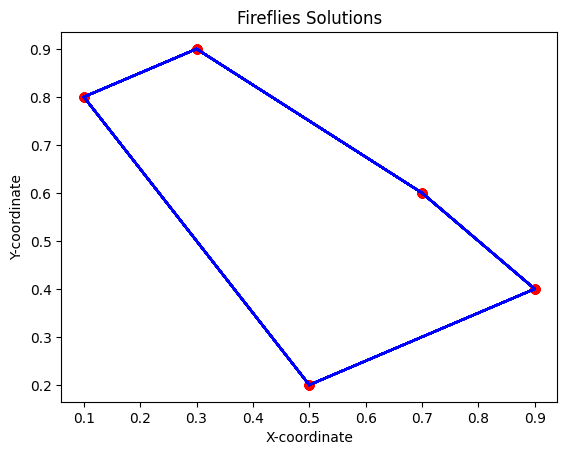

Best Solution:  [2, 4, 1, 0, 3]
Best Solution Length:  2.174773360817354


In [30]:
best_solution = perform_firefly_algorithm()
best_solution_length = calculate_tour_length(best_solution)
print("Best Solution: ", best_solution)
print("Best Solution Length: ", best_solution_length)
